<a href="https://colab.research.google.com/github/VamseeC21/CycleCompany/blob/main/OpiumRecords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing file: /content/January.csv


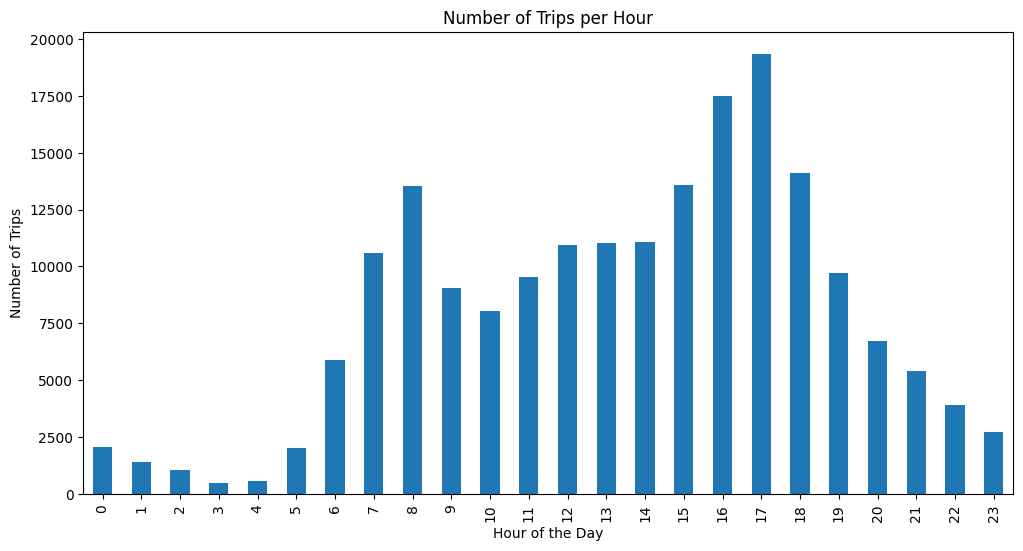

Processing file: /content/February.csv


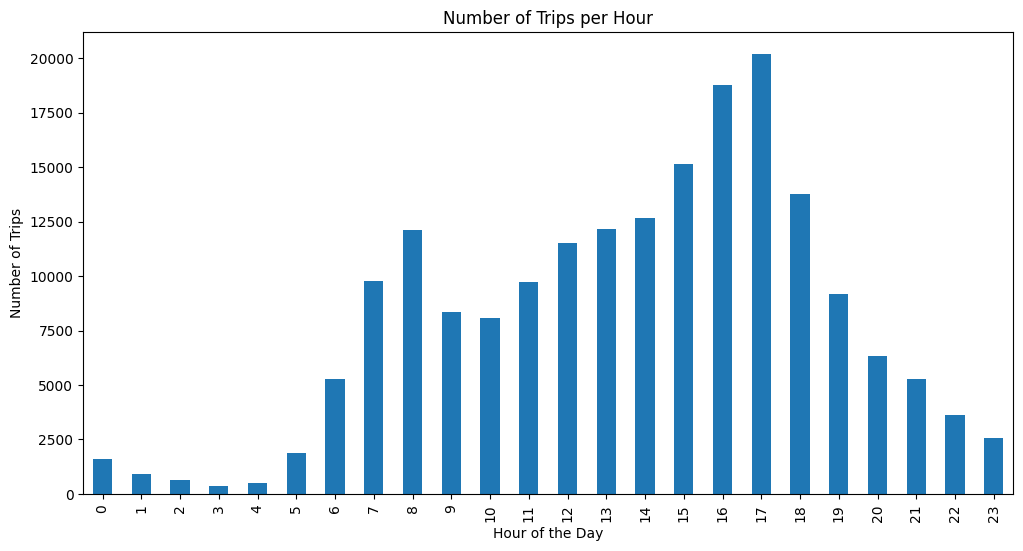

Processing file: /content/March.csv


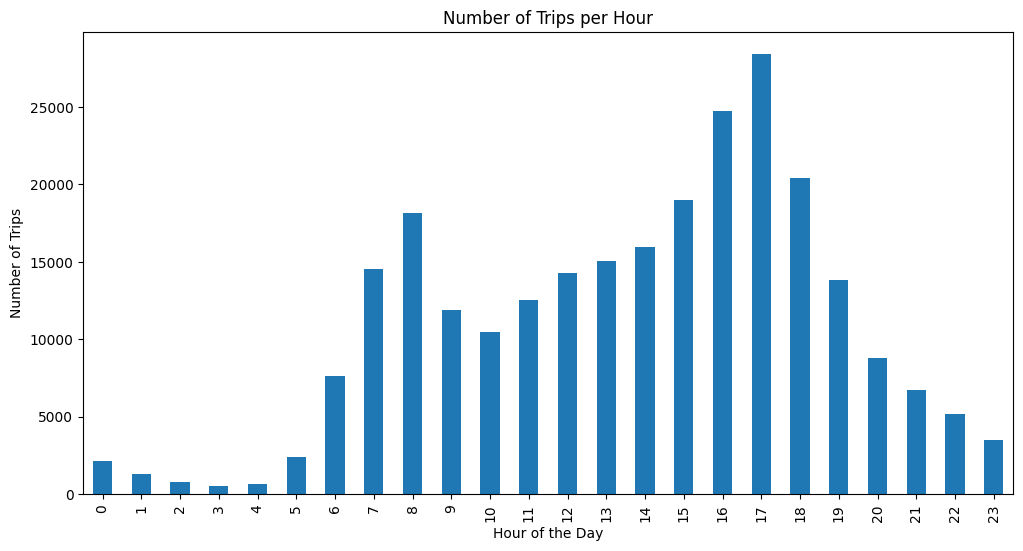

Processing file: /content/April.csv


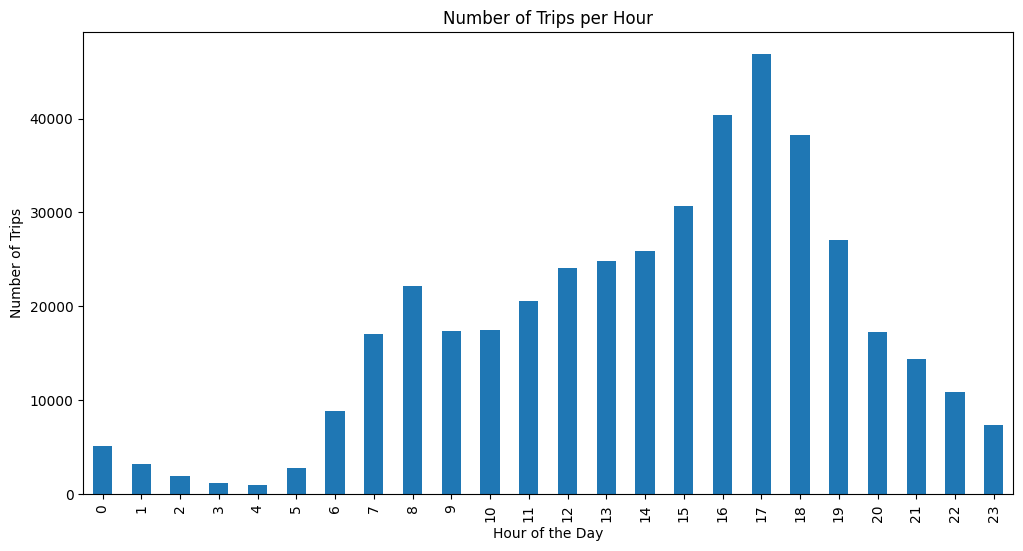

Processing file: /content/May.csv


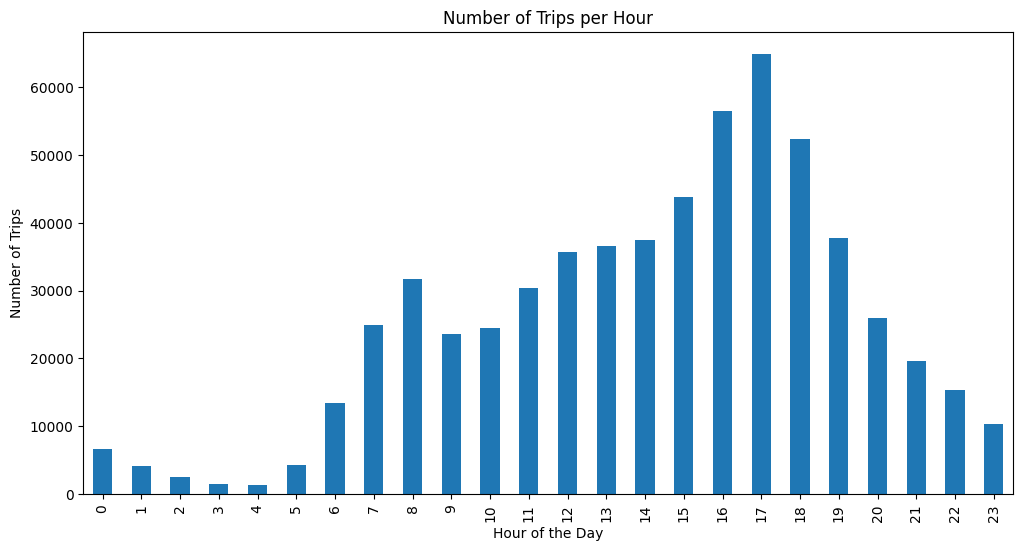

Processing file: /content/June.csv


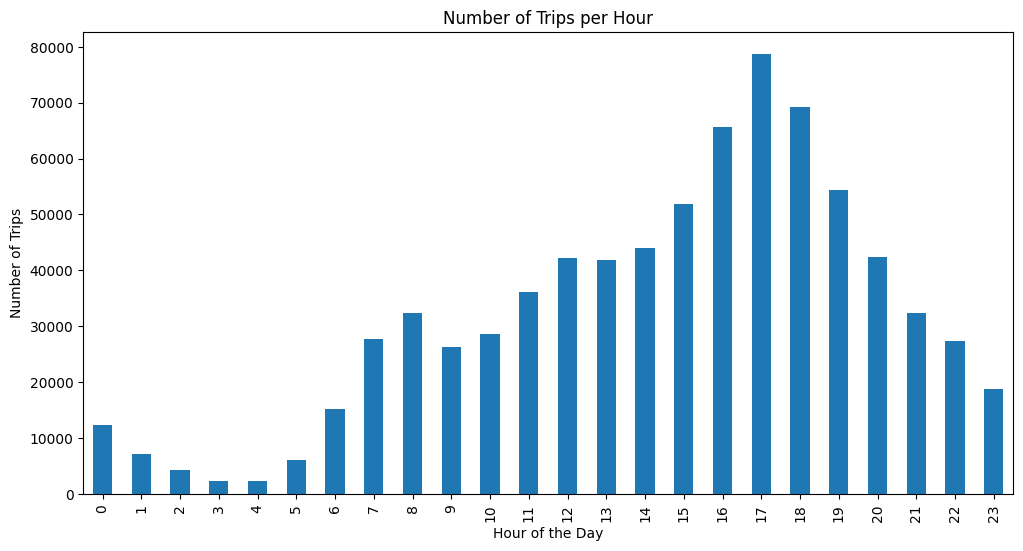

Processing file: /content/July.csv


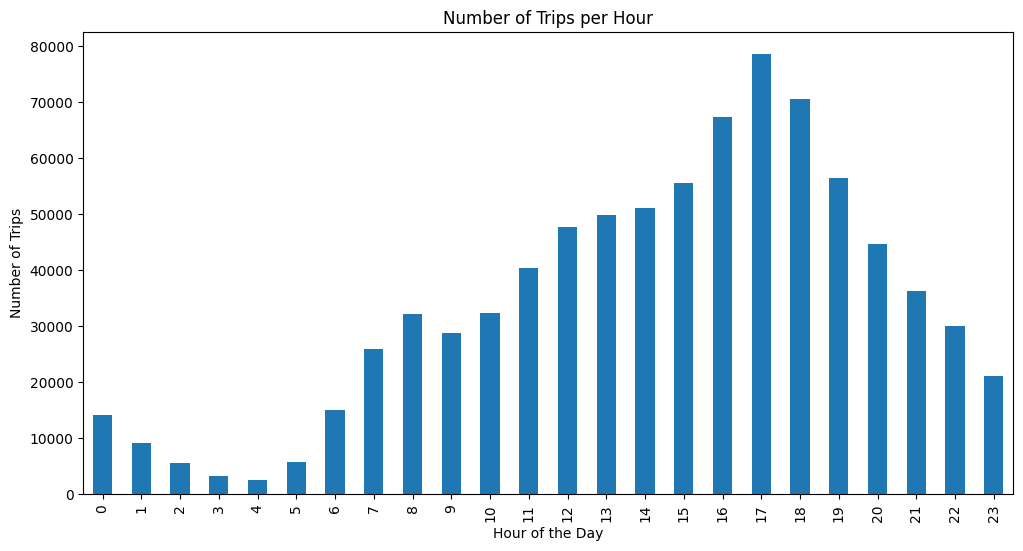

Processing file: /content/August.csv


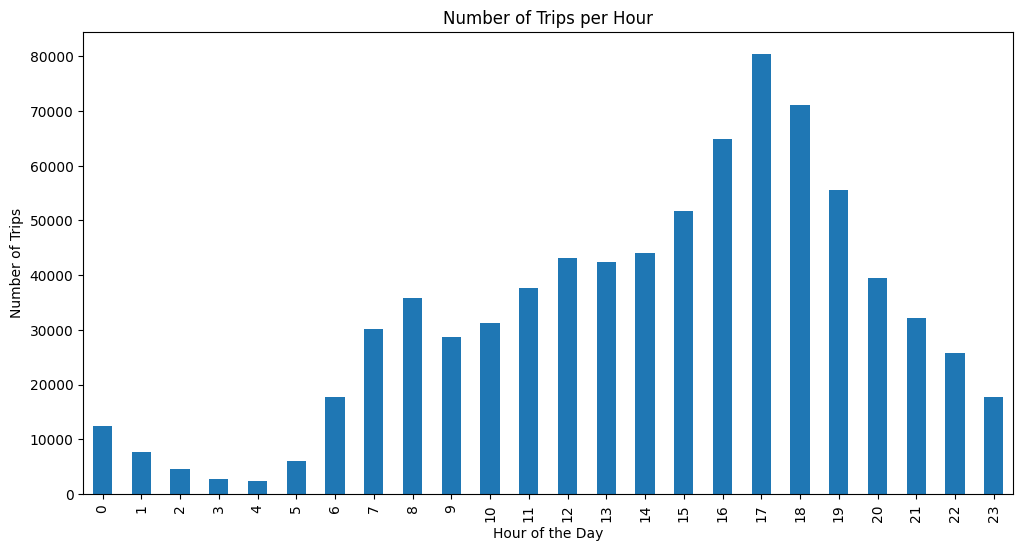

Processing file: /content/September.csv


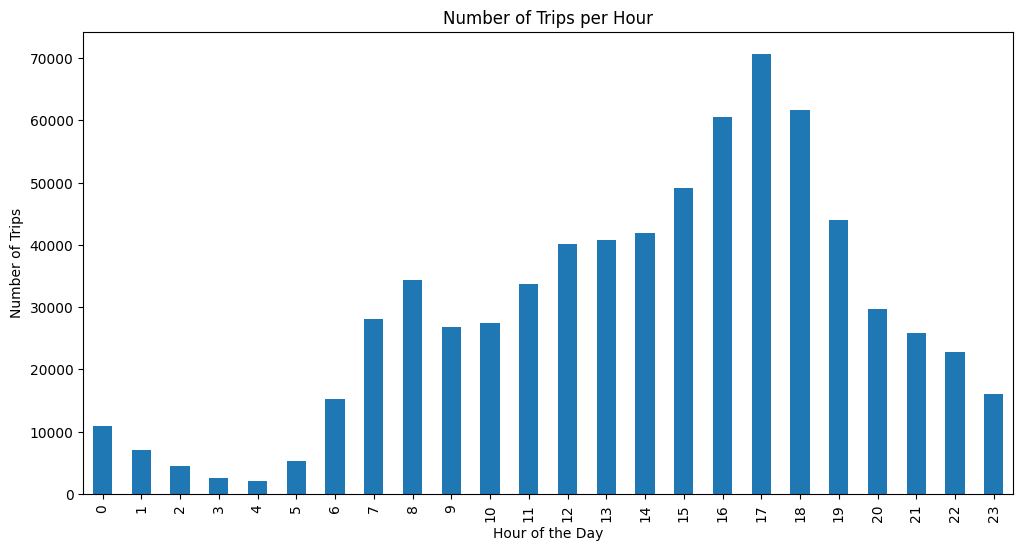

Processing file: /content/October.csv


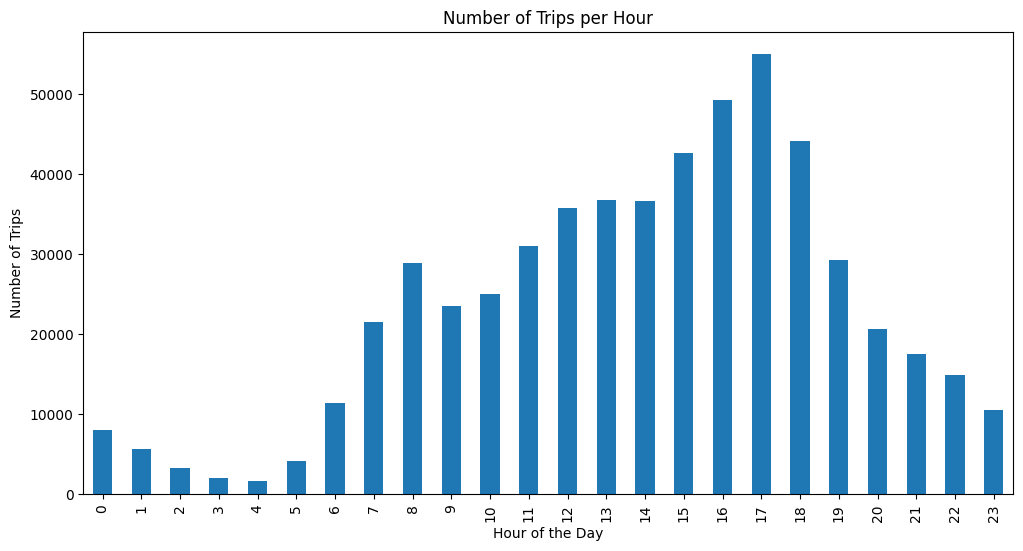

Processing file: /content/November.csv


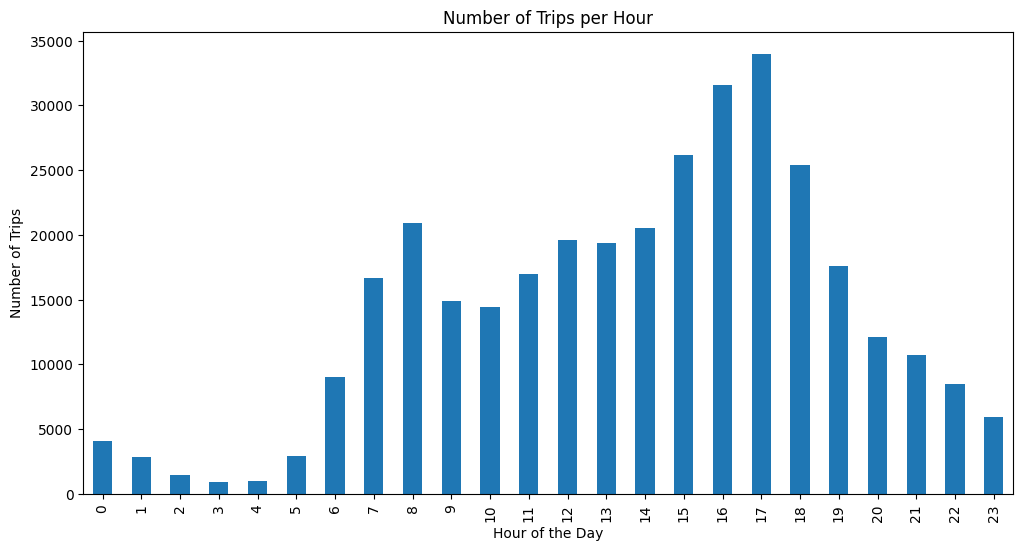

Processing file: /content/December.csv


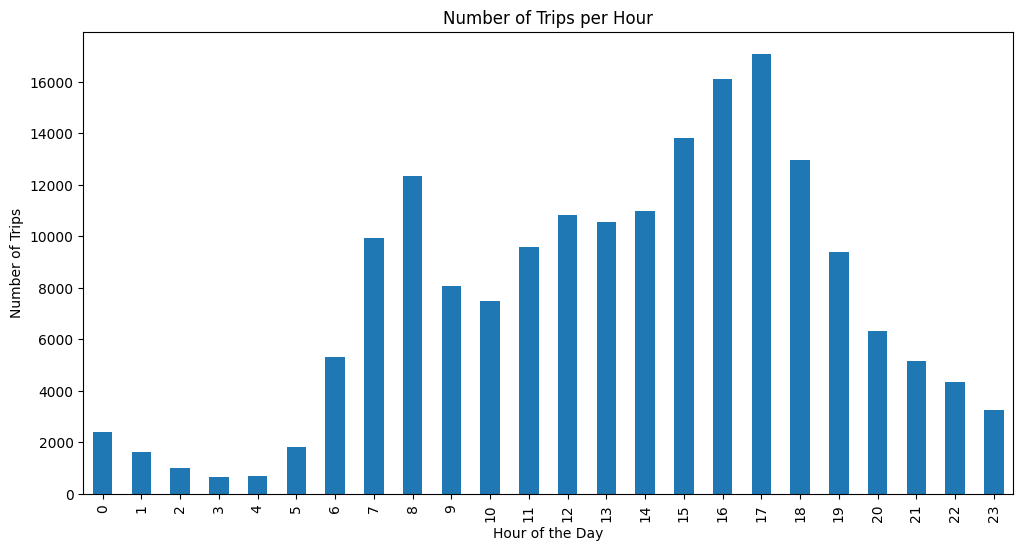

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def dataProcessing(data):
    # Data preprocessing
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['ended_at'] = pd.to_datetime(data['ended_at'])
    data['trip_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

    # Visualization: Number of trips per hour
    hourly_trips = data['started_at'].dt.hour.value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    hourly_trips.plot(kind='bar')
    plt.title('Number of Trips per Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.xticks(range(24), range(24))
    plt.show()

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Loop through the months
for month in months:
    file_name = f'/content/{month}.csv'
    print(f'Processing file: {file_name}')
    data = pd.read_csv(file_name)
    dataProcessing(data)


Processing file: /content/January.csv
Processing file: /content/February.csv
Processing file: /content/March.csv
Processing file: /content/April.csv
Processing file: /content/May.csv
Processing file: /content/June.csv
Processing file: /content/July.csv
Processing file: /content/August.csv
Processing file: /content/September.csv
Processing file: /content/October.csv
Processing file: /content/November.csv
Processing file: /content/December.csv


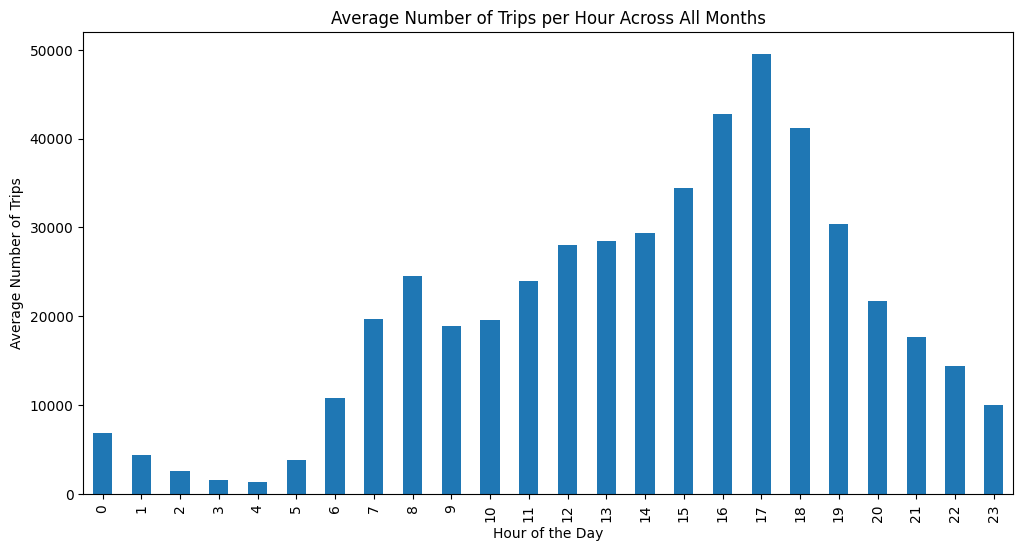

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def dataProcessing(data, monthly_hourly_trips):
    # Data preprocessing
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['ended_at'] = pd.to_datetime(data['ended_at'])
    data['trip_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

    # Accumulate hourly trips for each month
    hourly_trips = data['started_at'].dt.hour.value_counts().sort_index()
    monthly_hourly_trips.append(hourly_trips)

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Initialize an empty list to store hourly trips for each month
monthly_hourly_trips = []

# Loop through the months
for month in months:
    file_name = f'/content/{month}.csv'
    print(f'Processing file: {file_name}')
    data = pd.read_csv(file_name)
    dataProcessing(data, monthly_hourly_trips)

# Calculate the average hourly trips across all months
average_hourly_trips = pd.concat(monthly_hourly_trips, axis=1).mean(axis=1)

# Visualization: Average number of trips per hour across all months
plt.figure(figsize=(12, 6))
average_hourly_trips.plot(kind='bar')
plt.title('Average Number of Trips per Hour Across All Months')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.xticks(range(24), range(24))
plt.show()


Processing file: /content/January.csv
Processing file: /content/February.csv
Processing file: /content/March.csv
Processing file: /content/April.csv
Processing file: /content/May.csv
Processing file: /content/June.csv
Processing file: /content/July.csv
Processing file: /content/August.csv
Processing file: /content/September.csv
Processing file: /content/October.csv
Processing file: /content/November.csv
Processing file: /content/December.csv


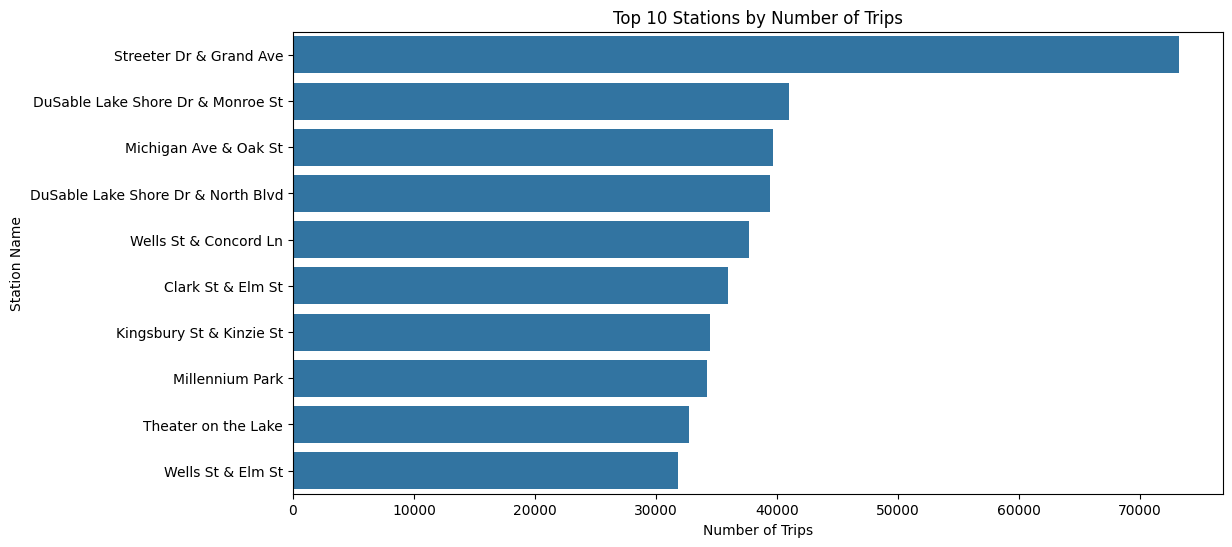

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def dataProcessing(data, station_counts):
    # Data preprocessing
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['ended_at'] = pd.to_datetime(data['ended_at'])
    data['trip_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

    # Accumulate start station counts for each month
    start_stations = data['start_station_name'].value_counts()
    station_counts = station_counts.add(start_stations, fill_value=0)
    return station_counts

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Initialize a Series to store start station counts
station_counts = pd.Series(dtype=float)

# Loop through the months
for month in months:
    file_name = f'/content/{month}.csv'
    print(f'Processing file: {file_name}')
    data = pd.read_csv(file_name)
    station_counts = dataProcessing(data, station_counts)

# Get the top 10 stations
top_10_stations = station_counts.sort_values(ascending=False).head(10)

# Visualization: Top 10 stations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.values, y=top_10_stations.index)
plt.title('Top 10 Stations by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Station Name')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def dataProcessing(data, station_counts):
    # Data preprocessing
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['ended_at'] = pd.to_datetime(data['ended_at'])
    data['trip_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

    # Count trips by bike type (electric or manual) for each station
    bike_type_counts = data.groupby(['start_station_name', 'rideable_type']).size().unstack(fill_value=0)

    # Calculate the percentage of electric bike trips for each station
    bike_type_counts['electric_percentage'] = (bike_type_counts['electric_bike'] /
                                               (bike_type_counts['electric_bike'] + bike_type_counts['standard_bike'])) * 100

    # Add the percentage of electric bike trips to the station_counts DataFrame
    station_counts = station_counts.add(bike_type_counts['electric_percentage'], fill_value=0)
    return station_counts

# List of month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Initialize a DataFrame to store start station counts
station_counts = pd.DataFrame()

# Loop through the months
for month in months:
    file_name = f'/content/{month}.csv'
    print(f'Processing file: {file_name}')
    data = pd.read_csv(file_name)
    station_counts = dataProcessing(data, station_counts)

# Get the top 10 stations by percentage of electric bike trips
top_10_stations = station_counts.mean(axis=1).sort_values(ascending=False).head(10)

# Visualization: Top 10 stations by percentage of electric bike trips
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.values, y=top_10_stations.index)
plt.title('Ebike vs Manual')
plt.xlabel('Percentage of Electric Bike Trips')
plt.ylabel('Station Name')
plt.show()


Processing file: /content/January.csv


FileNotFoundError: [Errno 2] No such file or directory: '/content/January.csv'